<a href="https://colab.research.google.com/github/iftekhar14/Playstore-Data-Analysis/blob/main/Playstore_Data_Exploritary_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> **Playstore Data Analysis** </b>

### **Project Type**    - EDA
### **Contribution**    - Individual


---



---




## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>


In [ ]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#mounting my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Capstone Project (EDA)/Play Store Data.csv'
df1=pd.read_csv(file_path)

In [ ]:
file_pathh = '/content/drive/MyDrive/Capstone Project (EDA)/User Reviews.csv'
df2=pd.read_csv(file_pathh)

In [ ]:
df1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Checking the Number of rows and columns
df1.shape

(10841, 13)

In [ ]:
#Checking the Dtype and not null count
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We can observe that while most of the columns have no null values, features such as 'Rating' and 'Current ver' have some. We will deal with them later in our analysis

**Descriptive Statistics**

In [ ]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


###Here we can observe that the max rating is 19, however that seems imporbable since the maximum rating you can give to any app is 5


In [ ]:
#Checking the row with the mismatched rating column
df1[df1['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#Removing 10472 due to data mismatch in the column since rating cannot exceed 5
df1.drop(df1.index[10472], inplace=True)

In [ ]:
#Removing '+' from the values of number of installs and converting it to numeric
df1['Installs'] = df1['Installs'].map(lambda x: x.rstrip('+'))
df1['Installs'] = pd.to_numeric(df1['Installs'].str.replace(',',''))

In [ ]:
#Removing '$' from the values of Price and converting it to numeric
df1['Price'] = pd.to_numeric(df1['Price'].str.replace('$',''))

<ipython-input-75-081e7cb92e83>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Price'] = pd.to_numeric(df1['Price'].str.replace('$',''))


In [ ]:
df1['Installs'].min(),df1['Installs'].max()

(0, 1000000000)

As we can notice,there is a high variance in the number of installs. To remove this we are adding a new column to dataframe, which is the log of number of installs

In [ ]:
df1['log_installs'] = np.log2(df1['Installs'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#Checking, if the dataframe contains any duplicate values for the same App name
boolean = df1['App'].duplicated().any()
boolean

True

In [ ]:
df1['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

As we can see from the above mentioned data, some of the apps have multiple rows. Lets now check whether each of these rows have identical data or not.

In [ ]:
df1[df1['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425


Here, we can observe that the ROBLOX app has multiple rows for the same data with just a difference in reviews. It may have happened that for the same app the data has been scraped in different points in time. We will keep the row with the maximum number reviews assuming it to be the latest one.

In [ ]:
df1.drop_duplicates(inplace=True)
df1.shape

(10357, 14)

In [ ]:
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,13.287712
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,18.931569
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,22.253497
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.575425
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,16.609640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,12.287712
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,6.643856
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,9.965784
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,9.965784


In [ ]:
#Converting the type of Reviews column to number
df1['Reviews'] = pd.to_numeric(df1['Reviews'].str.replace('$',''))
df1 = df1.loc[df1.groupby(['App'])['Reviews'].idxmax()]

<ipython-input-83-3e44909ce7b1>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Reviews'] = pd.to_numeric(df1['Reviews'].str.replace('$',''))


#**Genres**

In [ ]:
#Checking The top 20 apps present in the google play store as per their Genres
top_genres = df1.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
top_genres.head(20)

,Genres,Count
0,Tools,828
1,Entertainment,561
2,Education,510
3,Business,420
4,Medical,395
5,Personalization,376
6,Productivity,374
7,Lifestyle,368
8,Finance,345
9,Sports,331


In [ ]:
#checking the top genres based on the number of installations
genres_installs = df1.groupby(['Genres'])[['Installs']].sum().reset_index()
genres_installs

,Genres,Installs
0,Action,3483039190
1,Action;Action & Adventure,53020500
2,Adventure,296695320
3,Adventure;Action & Adventure,106150000
4,Adventure;Brain Games,100000
...,...,...
113,Video Players & Editors,3916902720
114,Video Players & Editors;Creativity,5000000
115,Video Players & Editors;Music & Video,15000000
116,Weather,361100520


In [ ]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)
top_20_genres_installs

,Genres,Count,Installs
0,Tools,828,8092771915
1,Entertainment,561,3014714684
2,Education,510,262910148
3,Business,420,697164865
4,Medical,395,38293077
5,Personalization,376,1532494782
6,Productivity,374,5793091369
7,Lifestyle,368,493823539
8,Finance,345,455348734
9,Sports,331,1412474498


###**Creating a barplot for the top 20 genres installed**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


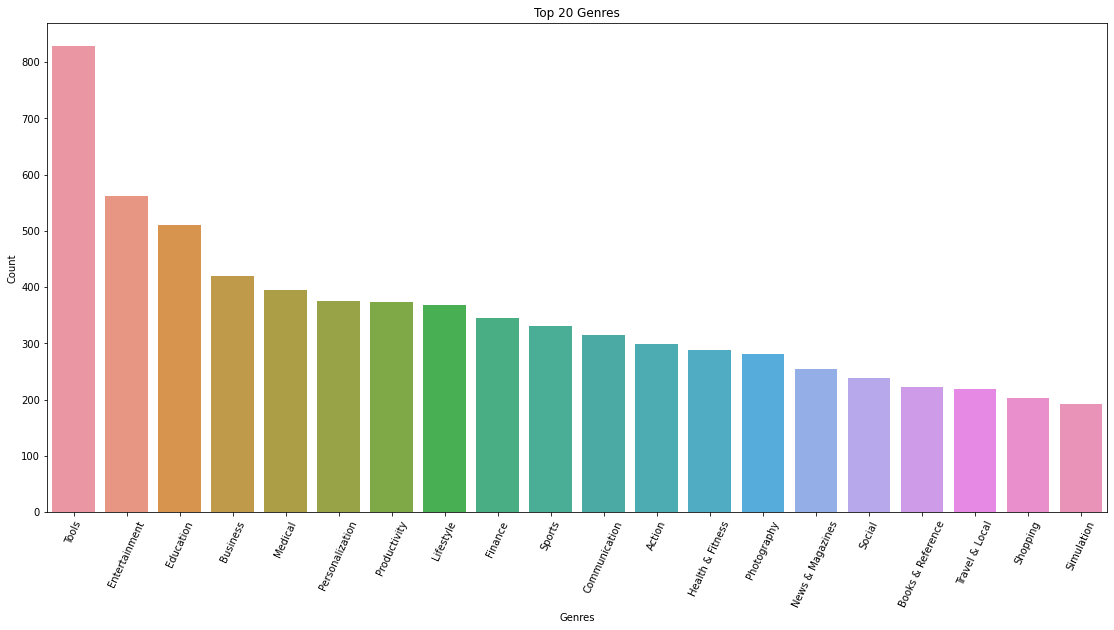

In [ ]:
plt.figure(figsize=(19,9))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()
# The Genres that are getting installed the most in top 20 Genres

###**Creating a barplot showing the number of installs for the top 20 genres**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


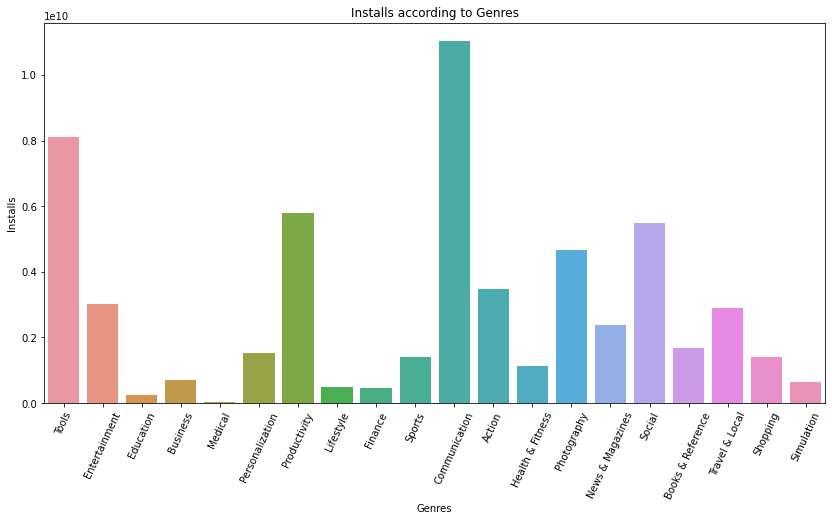

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()


* The first plot was showing the number of apps from the same genres that were installed.

* The second plot was showing the number of installs for each of the genres(TOP 20)

---

###As we can see from the above two plots: Maxinum number of apps present in google play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.


#**Category**

In [ ]:
#Checking The top 20 apps present in the google play store as per their Category
top_category = df1.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
top_category

,Category,Count
0,FAMILY,1874
1,GAME,946
2,TOOLS,829
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [ ]:
#Checking the most number of installs for different category apps
category_installs = df1.groupby(['Category'])[['Installs']].sum()
category_installs

,Installs
Category,
ART_AND_DESIGN,113238100
AUTO_AND_VEHICLES,53130211
BEAUTY,27197050
BOOKS_AND_REFERENCE,1665969576
BUSINESS,697164865
COMICS,44981150
COMMUNICATION,11038276251
DATING,140925107
EDUCATION,189952000


In [ ]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs.head(20)

###**Creating a barplot for the top categories that were installed**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


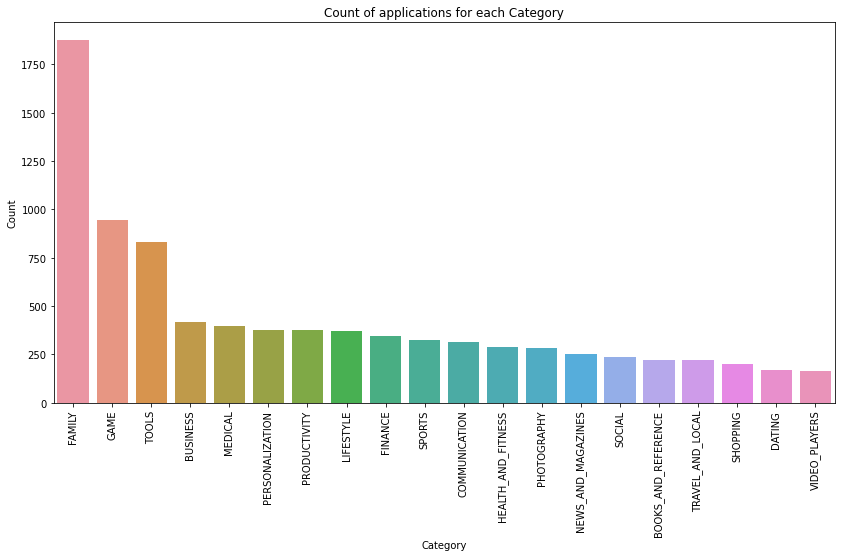

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
plt.show()

###**Creating a barplot checking the number of installs for each category**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


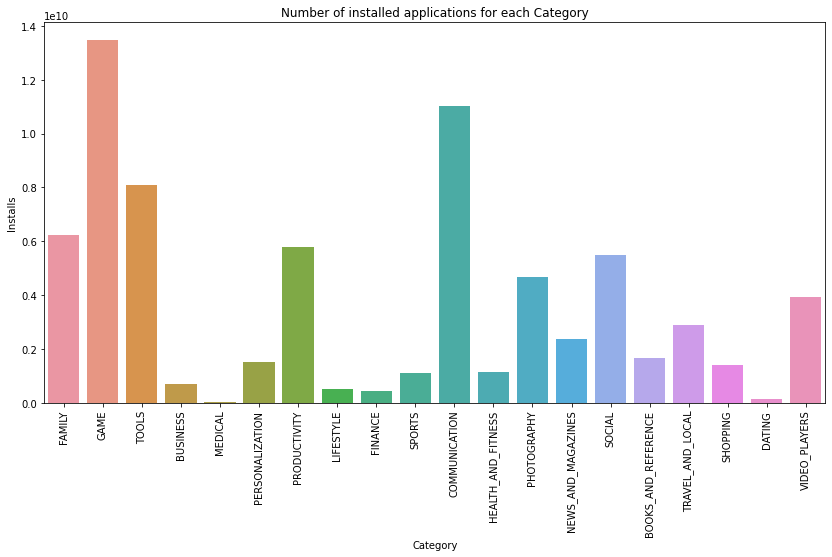

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
plt.show()

###As we can see from the above two plots: Maximum number of apps present in google play store comes under Family, Games and Tools Category but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Games, Communication and Tools.

#**Rating**

In [ ]:
genres_ratings_df = df1.groupby(['Genres'])[['Rating']].mean()
genres_ratings_df

,Rating
Genres,
Action,4.244863
Action;Action & Adventure,4.316667
Adventure,4.178873
Adventure;Action & Adventure,4.300000
Adventure;Brain Games,4.600000
...,...
Video Players & Editors,4.044898
Video Players & Editors;Creativity,4.100000
Video Players & Editors;Music & Video,4.000000


In [ ]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')
genres_installs_ratings

,Genres,Count,Installs,Rating
0,Tools,828,8092771915,4.039638
1,Entertainment,561,3014714684,4.083439
2,Education,510,262910148,4.290909
3,Business,420,697164865,4.098479
4,Medical,395,38293077,4.165862
...,...,...,...,...
113,Health & Fitness;Action & Adventure,1,1000000,3.900000
114,Art & Design;Pretend Play,1,500000,3.900000
115,Travel & Local;Action & Adventure,1,100000,4.100000
116,Trivia;Education,1,100,NaN


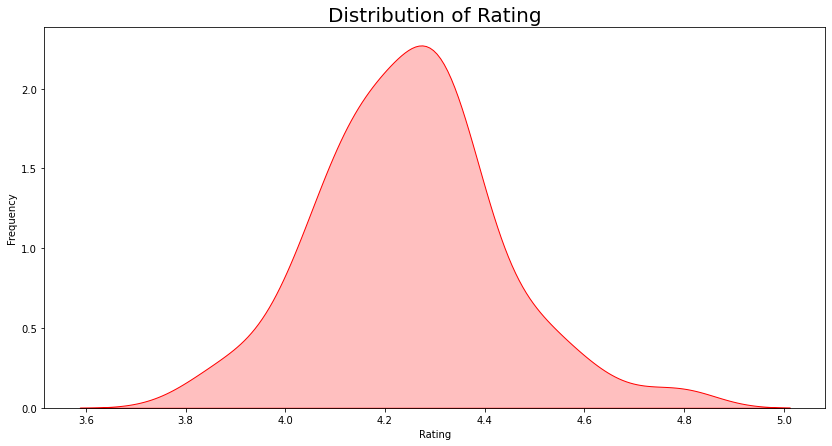

In [ ]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genres_installs_ratings.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

In [ ]:
#Highest and lowest rated Genres
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [ ]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


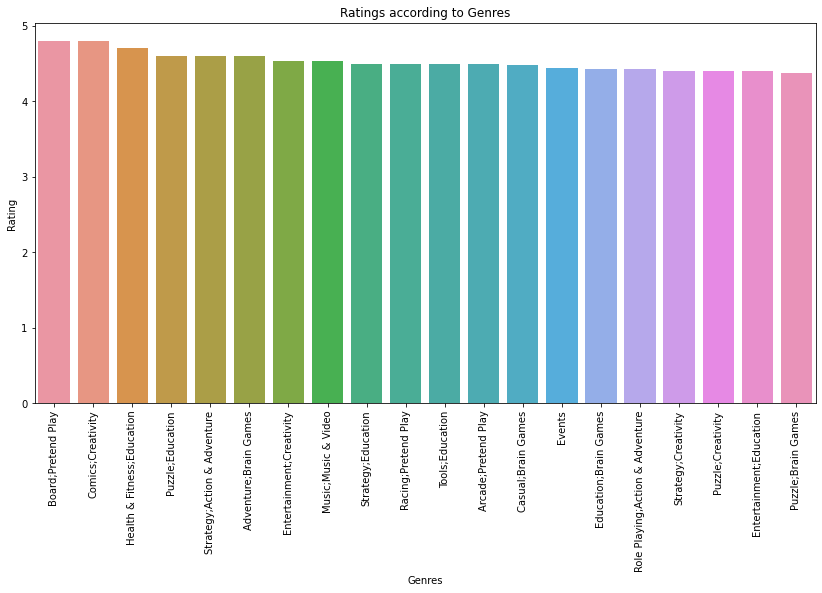

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


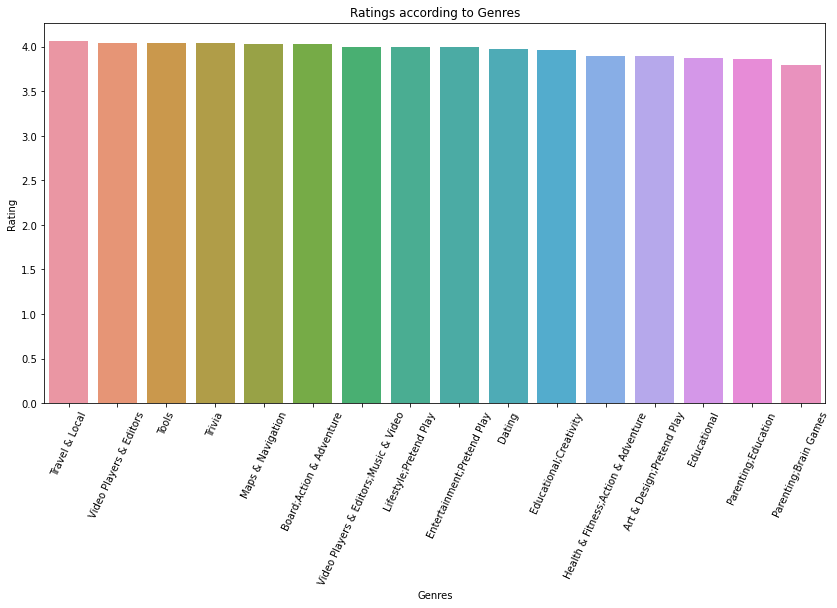

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)
plt.show()

#**Type**

In [ ]:
#The count of applications in each category differentiated by their type
df1['Type'].value_counts()

Free    8904
Paid     754
Name: Type, dtype: int64

There are only two types of apps, we will now take the count of apps in each category differentiated by their type

In [ ]:
app_count = df1.groupby(['Category','Type'])[['App']].count().reset_index()
app_count.rename(columns={'App':'Count','index':'App'}, inplace = True)
app_count

,Category,Type,Count
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,160
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,71


In [ ]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
df_app_count

Type,Category,Free,Paid
0,ART_AND_DESIGN,58.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,0.0
3,BOOKS_AND_REFERENCE,194.0,28.0
4,BUSINESS,408.0,12.0
5,COMICS,56.0,0.0
6,COMMUNICATION,288.0,27.0
7,DATING,165.0,5.0
8,EDUCATION,104.0,3.0
9,ENTERTAINMENT,85.0,2.0


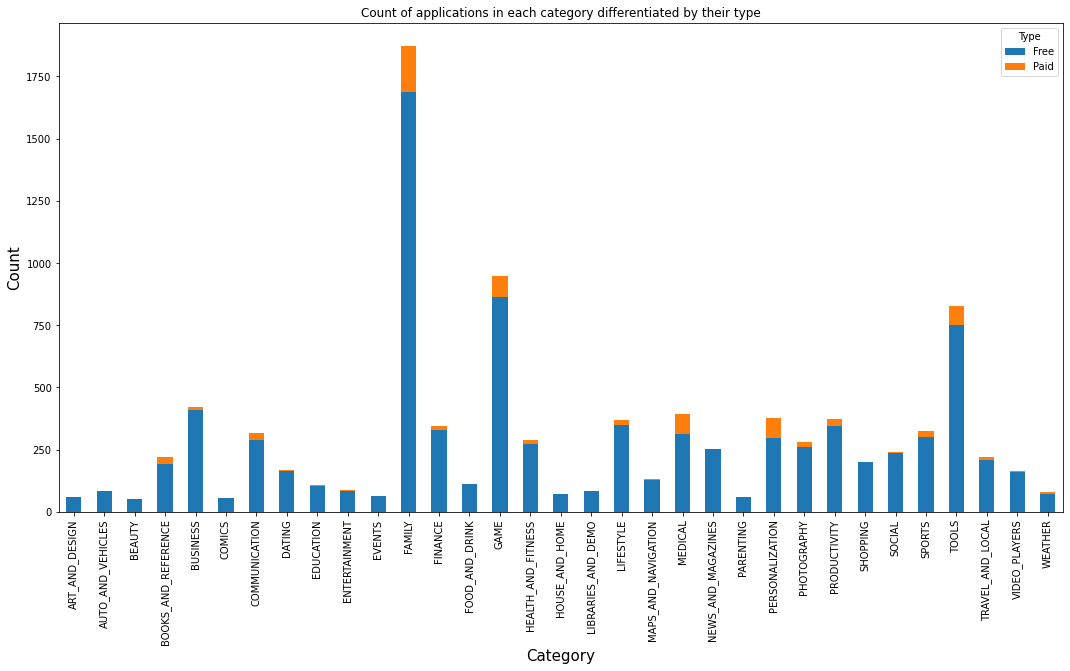

In [ ]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

###It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Food & Drink and Tools, as well as Social categories were free to install. At the same time Family, Sports, Tools and Medical categories had the biggest number of paid apps available for download.

##How many apps were installed according to its type?

In [ ]:
category_type_installs = df1.groupby(['Category','Type'])[['Installs']].sum().reset_index()
category_type_installs

,Category,Type,Installs
0,ART_AND_DESIGN,Free,113222100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,53080061
3,AUTO_AND_VEHICLES,Paid,50150
4,BEAUTY,Free,27197050
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,183060
59,VIDEO_PLAYERS,Free,3931831720
60,VIDEO_PLAYERS,Paid,71000
61,WEATHER,Free,360288520


In [ ]:
#Applying log transformation

category_type_installs['log_Installs'] = np.log2(category_type_installs['Installs'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


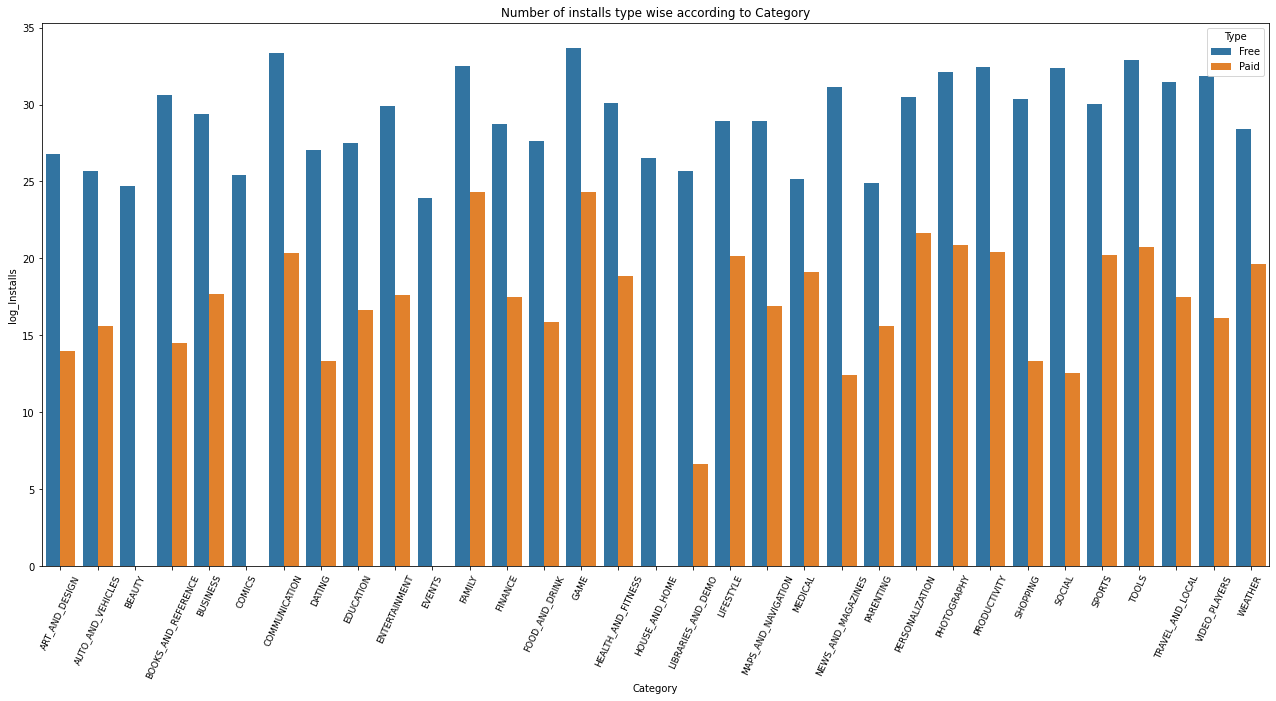

In [ ]:
plt.figure(figsize=(22,10))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=category_type_installs);
plt.show()

###It can be concluded that the number of free applications installed by the user are high when compared with the paid ones.

#**Size**

###Size of the applications present in the datset are in MB and KB. Therefore for ease in data processing, converting entire size column to MB.

In [ ]:
df1.tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
9200,বাংলাflix,FAMILY,4.2,1111,7.3M,100000,Free,0.00,Everyone,Entertainment,"June 5, 2018",3.6.1,4.1 and up,16.609640
1592,သိင်္ Astrology - Min Thein Kha BayDin,LIFESTYLE,4.7,2225,15M,100000,Free,0.00,Everyone,Lifestyle,"July 26, 2018",4.2.1,4.0.3 and up,16.609640
3960,► MultiCraft ― Free Miner! 👍,GAME,4.3,1305050,Varies with device,50000000,Free,0.00,Everyone 10+,Adventure,"July 29, 2018",1.1.11.11,4.1 and up,25.575425
5569,【Miku AR Camera】Mikuture,FAMILY,4.4,36268,41M,1000000,Free,0.00,Teen,Entertainment,"April 25, 2017",3.0.15,4.2 and up,19.931569
321,【Ranobbe complete free】 Novelba - Free app tha...,COMICS,NaN,1330,22M,50000,Free,0.00,Everyone,Comics,"July 3, 2018",6.1.1,4.2 and up,15.609640
6418,あなカレ【BL】無料ゲーム,FAMILY,4.7,6073,8.5M,100000,Free,0.00,Mature 17+,Simulation,"February 25, 2018",4.2.2,2.3 and up,16.609640
9466,パーリーゲイツ公式通販｜EJ STYLE（イージェイスタイル）,SHOPPING,NaN,1,9.3M,100,Free,0.00,Everyone,Shopping,"November 16, 2017",3.0,4.0.3 and up,6.643856
5513,中国語 AQリスニング,FAMILY,NaN,21,17M,5000,Free,0.00,Everyone,Education,"June 22, 2016",2.4.0,4.0 and up,12.287712
1488,"乐屋网: Buying a house, selling a house, renting ...",HOUSE_AND_HOME,3.7,2248,15M,100000,Free,0.00,Everyone,House & Home,"August 3, 2018",v3.1.1,4.0 and up,16.609640
3824,乗換NAVITIME Timetable & Route Search in Japan T...,MAPS_AND_NAVIGATION,4.4,50459,Varies with device,5000000,Free,0.00,Everyone,Maps & Navigation,"July 26, 2018",Varies with device,Varies with device,22.253497


In [ ]:
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: float(x))

##**How does size impact on the number of installs of any application?**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


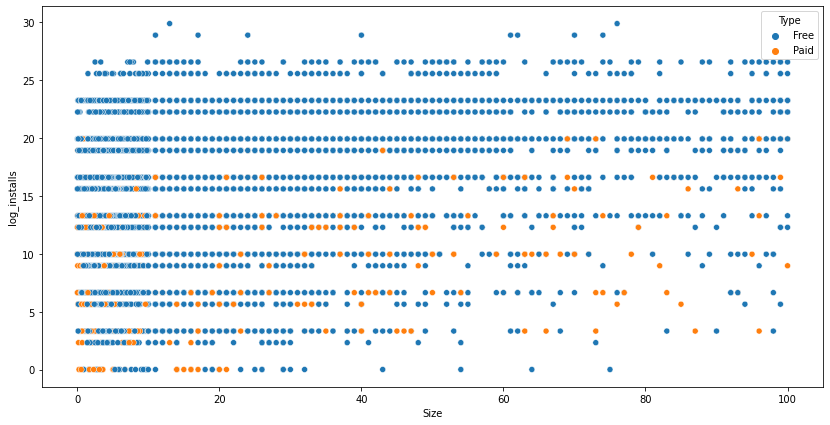

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(df1['Size'], df1['log_installs'], hue=df1['Type'])
plt.show()

###It is clear from the above mentioned plot that size may impact the number of installations. Bulky applications are less installed by the user.

##**Histogram of log installs**

In [ ]:
df1.loc[df1['log_installs']==df1['log_installs'].min(),'log_installs']=0

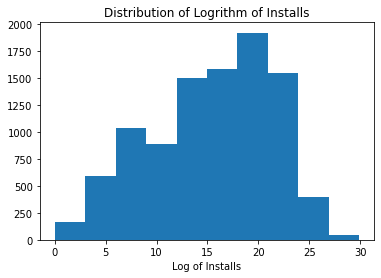

In [ ]:
plt.xlabel("Log of Installs")
plt.title("Distribution of Logrithm of Installs")
plt.hist(df1['log_installs']);

##**Histogram of size**

In [ ]:
df1.loc[df1['Size'].isnull(),'Size']=0

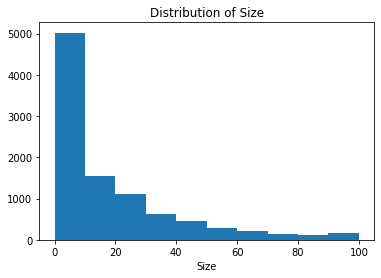

In [ ]:
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(df1['Size']);
plt.show()

###From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.

#**User Reviews Dataset**

In [ ]:
df2.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#checking the shape of this dataset
df2.shape

(64295, 5)

#**Merging dataframes on apps**

In [ ]:
merged_df = df1.merge(df2, on="App")
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,18.931569,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,18.931569,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,18.931569,NaN,NaN,NaN,NaN
3,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,18.931569,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,18.931569,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61551,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353813,0.0,10000000,Free,0.0,Everyone,House & Home,"August 1, 2018",Varies with device,Varies with device,23.253497,NaN,NaN,NaN,NaN
61552,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353813,0.0,10000000,Free,0.0,Everyone,House & Home,"August 1, 2018",Varies with device,Varies with device,23.253497,NaN,NaN,NaN,NaN
61553,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353813,0.0,10000000,Free,0.0,Everyone,House & Home,"August 1, 2018",Varies with device,Varies with device,23.253497,NaN,NaN,NaN,NaN
61554,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353813,0.0,10000000,Free,0.0,Everyone,House & Home,"August 1, 2018",Varies with device,Varies with device,23.253497,NaN,NaN,NaN,NaN


###In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].

###What is the distribution of type of reviews in the dataset?

In [ ]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment

,Category,Sentiment,Sentiment Count
0,ART_AND_DESIGN,Negative,47
1,ART_AND_DESIGN,Neutral,58
2,ART_AND_DESIGN,Positive,233
3,AUTO_AND_VEHICLES,Negative,17
4,AUTO_AND_VEHICLES,Neutral,36
...,...,...,...
94,VIDEO_PLAYERS,Neutral,58
95,VIDEO_PLAYERS,Positive,190
96,WEATHER,Negative,28
97,WEATHER,Neutral,31


In [ ]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])
category_sentiment

,Category,Sentiment,Sentiment Count,log_sentiment_count
0,ART_AND_DESIGN,Negative,47,5.554589
1,ART_AND_DESIGN,Neutral,58,5.857981
2,ART_AND_DESIGN,Positive,233,7.864186
3,AUTO_AND_VEHICLES,Negative,17,4.087463
4,AUTO_AND_VEHICLES,Neutral,36,5.169925
...,...,...,...,...
94,VIDEO_PLAYERS,Neutral,58,5.857981
95,VIDEO_PLAYERS,Positive,190,7.569856
96,WEATHER,Negative,28,4.807355
97,WEATHER,Neutral,31,4.954196


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


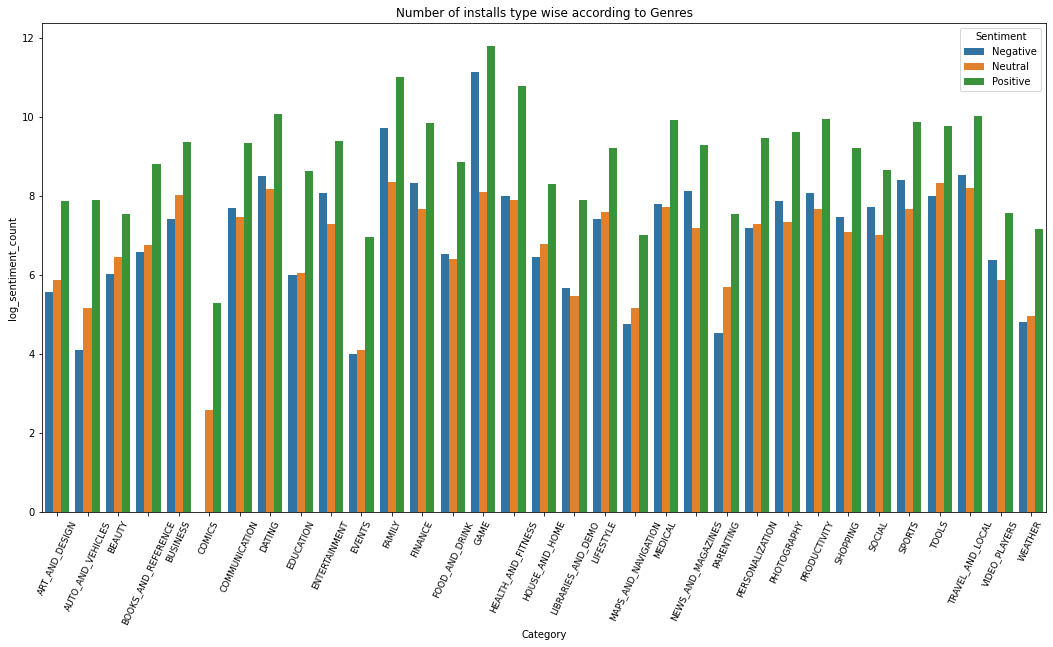

In [ ]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Genres")
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

##**Histogram of subjectivity**

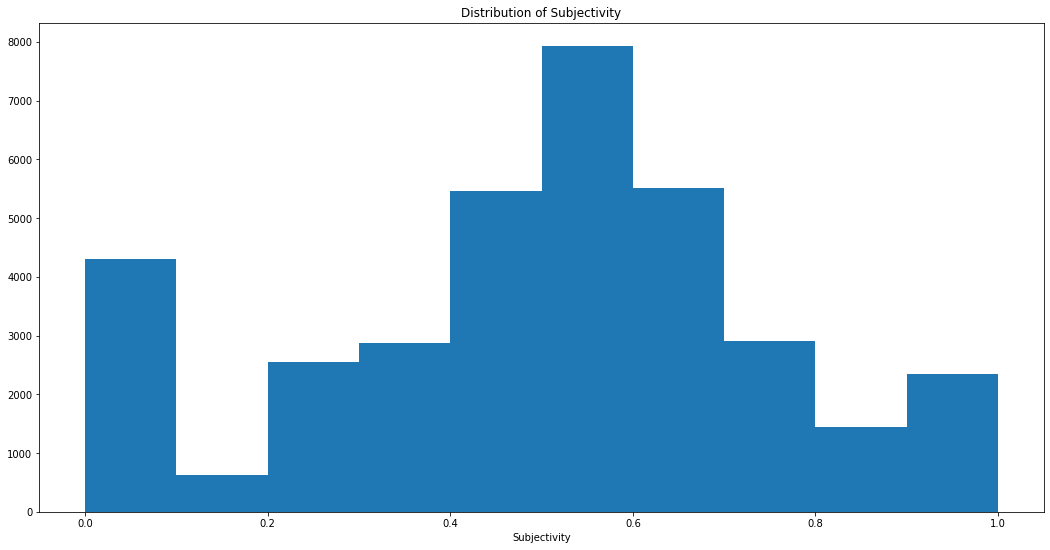

In [ ]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

###It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

##**Is sentiment_subjectivity proportional to sentiment_polarity?**

In [ ]:
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()

In [ ]:
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


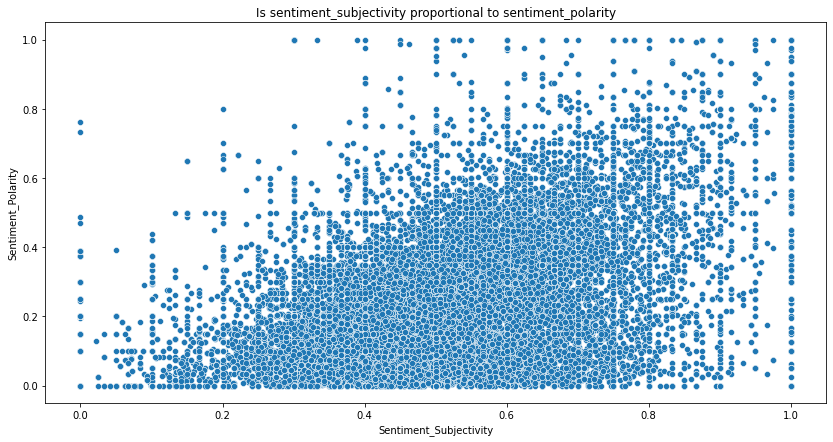

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Is sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

###From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

In [ ]:
review_notnull = merged_df[merged_df['Translated_Review'].notnull()]

###**Percentage of Review Sentimets**

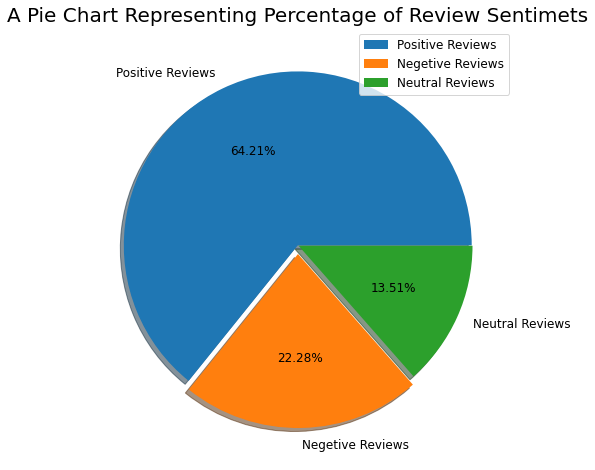

In [ ]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

# **CONCLUSION**

1.	Maximum installed apps comes under communications ,tools and productivity on the basis genres.
2.	Maximum installed apps comes under communications ,tools and games on the basis of category.
3.	 In our dataset, the majority of apps in Family, Food & Drink and Tools, as well as Social categories were free to install. At the same time Family, Sports, Tools and Medical categories had the biggest number of paid apps available for download.
4.	 It can be concluded that maximum number of applications present in the dataset are of small size.
5.	It can concluded that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.
6.	From the review sentiments 64.21% are positive reviews , 22.8% are negative reviews and 13.51% are neutral reviews
